# Applied Time Series Analysis Lab 3

### David Huang
### May 12, 2021

## Background and Introduction

Filters are often used to subset data. Doing so offers a more focused subset of the raw dataset, and helps with having more efficient (and sometimes even a more effective) analysis.

While filters can often be used to keep important details and withhold any erroneous or ones, for this lab we'll look at something a little different: how the butterworth filter performs on a strongly stationary dataset, or more specifically, a dataset with a constant frequency throughout.

## Methods

The dataset I will be using is the audio of a standard tuning note. This note is often used by musicians to tune their instruments, including (but not limited to) guitars, oboes, violins, and even entire orchestras. The note has a pitch (frequency) of 440 Hz, which is often referred to as the note "A" in more musical terms.

First, we will import the necessary packages.

In [ ]:
# Lab 3
# David Huang

install.packages('tswge')
install.packages('tuneR', dependencies = TRUE)

library('tswge')
library('tuneR')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘signal’, ‘PolynomF’, ‘waveslim’, ‘astsa’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pastecs’




## Importing the Data

We'll pull from an online source for *code reproducibility*. The file will also save locally so that we can access it more immediately.

In [ ]:
note.url <- "https://github.com/ds-wm/atsa-2021/raw/main/labs/lab3/Note_A_440_hz.mp3"
note.file <- "./note.mp3"
download.file(
  url = note.url, 
  destfile = note.file, 
  method = "auto")
note.mp3 <- readMP3(note.file)

Since the audio file has a high sampling rate of 44100 Hz, or 44100 samples per second, I plan to only use a 2-second portion (and sometimes even less) for this lab's analysis.

In [ ]:
# shorten the clip so that code doesn't have to take forever
note.mp3 <- note.mp3[44101:132301]

Display some very basic information about the data we have now.

In [ ]:
# Some summary statistics about our soundbite 
str(note.mp3)

# Check for the length of the soundbite in seconds 
note.num_samples <- length(note.mp3@left)
note.seconds <- note.num_samples / note.mp3@samp.rate 

cat('\n', 'The drum1 sound file is', note.seconds, 'seconds long.')

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:88201] 3114 2542 1959 1368 773 175 -426 -1024 -1618 -2206 ...
  ..@ right    : int [1:88201] 3115 2543 1959 1368 773 175 -425 -1024 -1618 -2206 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 44100
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE

 The drum1 sound file is 2.000023 seconds long.

We can take just the left ear to "flatten" the audio so that it's one-dimensional.

In [ ]:
# Pull out just the left channel
note.mono <- note.mp3@left

# Reduce the sound array
note.reduced <- (note.mono / 2^(note.mp3@bit - 1))

### Plotting the Data

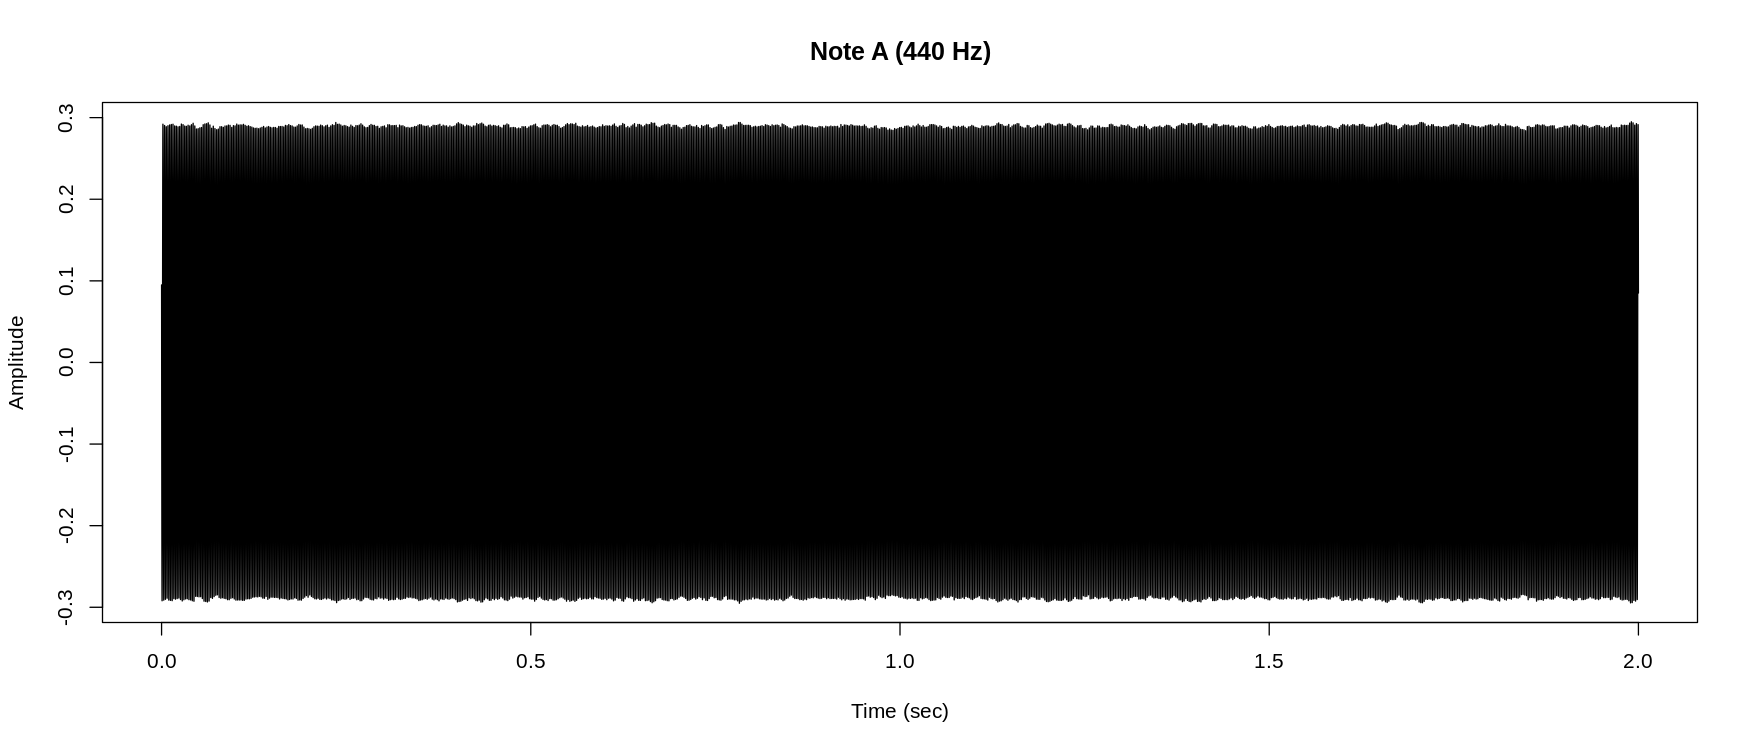

In [ ]:
# Create an array with time points for the clip
note.time <- (0:(note.num_samples - 1)) / note.mp3@samp.rate

# Plot the sound file
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(note.time, 
  note.reduced,
  type='l', 
  col='black',
  main = 'Note A (440 Hz)',  
  xlab='Time (sec)', 
  ylab='Amplitude')

While this looks like just a black box, it's actually a bunch of oscillations at an extremely high rate, so much that the lines of the plot collide with each other to make a fully-shaded black box. 

This is completely expected, as the audio being played is a constant-sounding note, and the plot is generated at such a large scale. Let's take a look at what the wavelength looks like for the samples from 1-1000. (This would be just over 2% of a single second!)

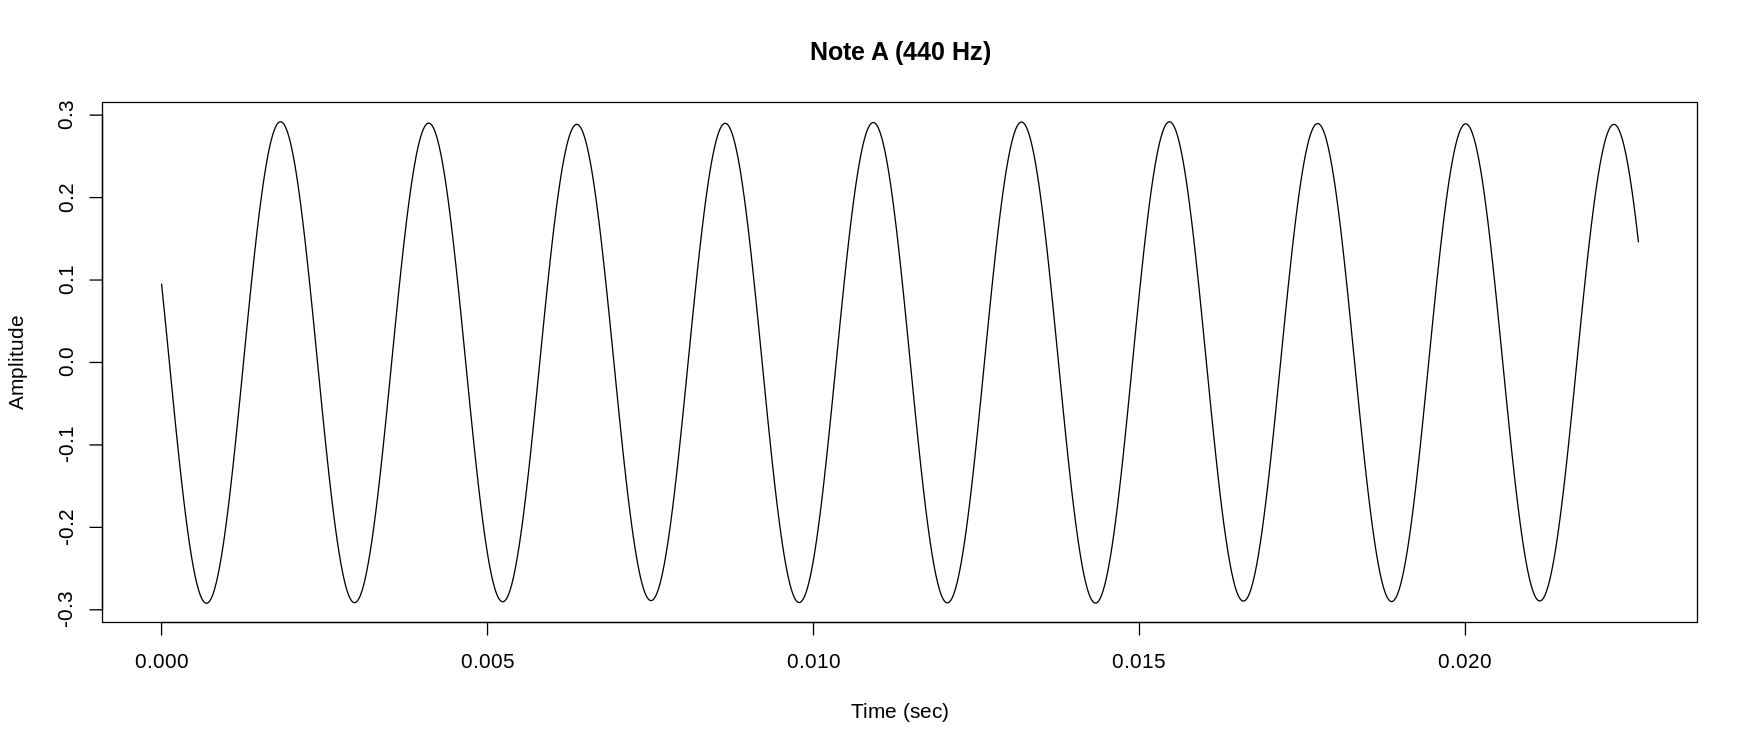

In [ ]:
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(note.time[1:1000], 
  note.reduced[1:1000],
  type='l', 
  col='black',
  main = 'Note A (440 Hz)',  
  xlab='Time (sec)', 
  ylab='Amplitude')

Note that while we've zoomed in heavily on the x-axis (time scale), the y-axis remains the same as the previous graph. It really shows you how condensed the zoomed-out graph is, at only 2% of a single second being shown here!

### Filtering the Data using Butterworth

Now, we will apply the butterworth filter with high-pass and low-pass on our dataset.

First, the high-pass filter.

In [ ]:
highp <- butterworth.wge(note.reduced, 4, type = 'high', cutoff = 0.0125, plot = FALSE)

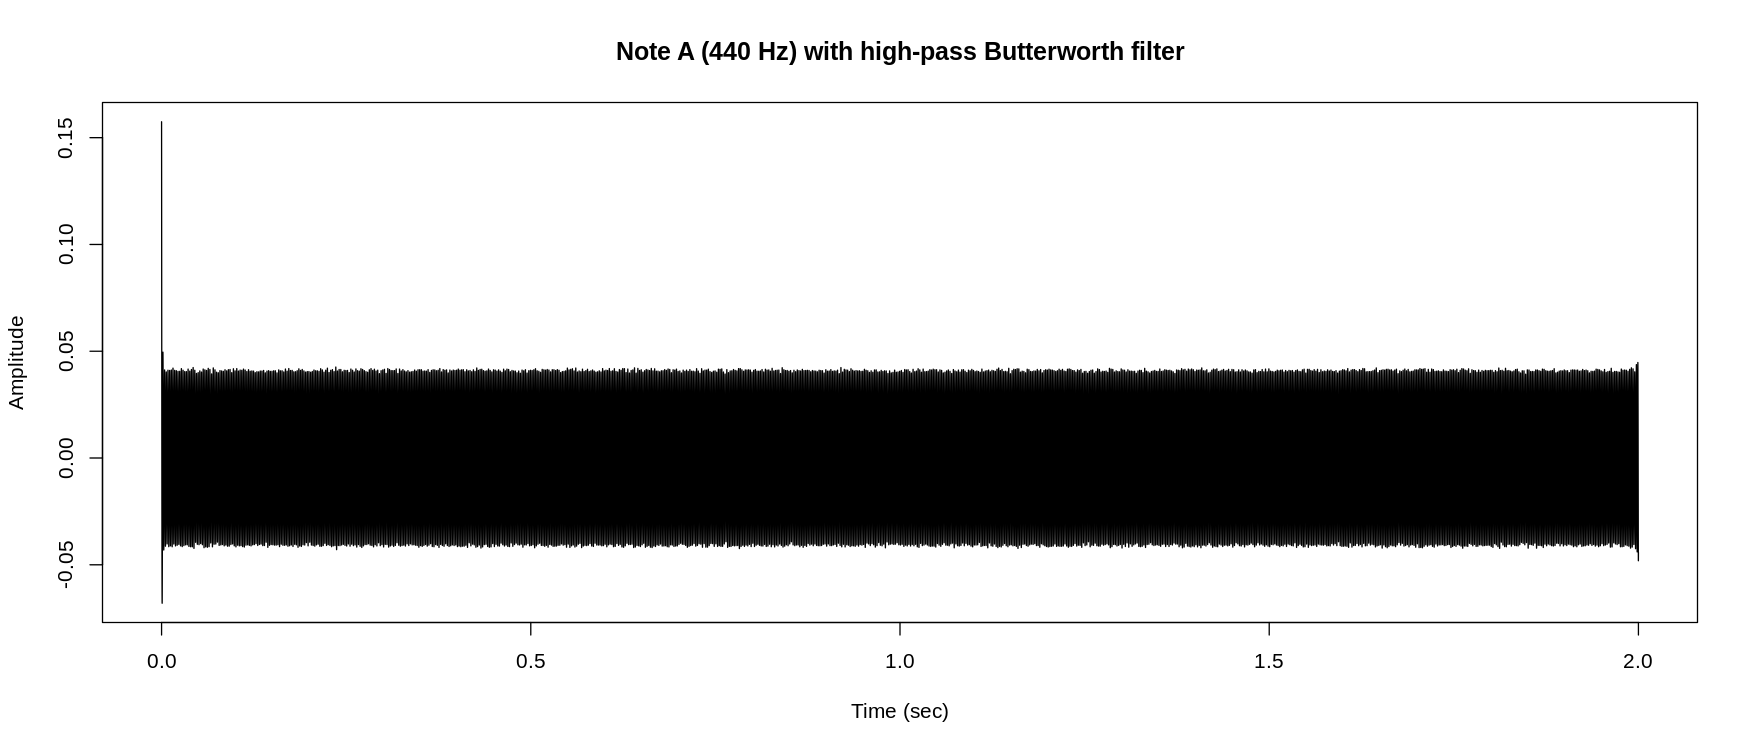

In [ ]:
plot(note.time, 
  highp$x.filt,
  type='l', 
  col='black',
  main = 'Note A (440 Hz) with high-pass Butterworth filter',  
  xlab='Time (sec)', 
  ylab='Amplitude')

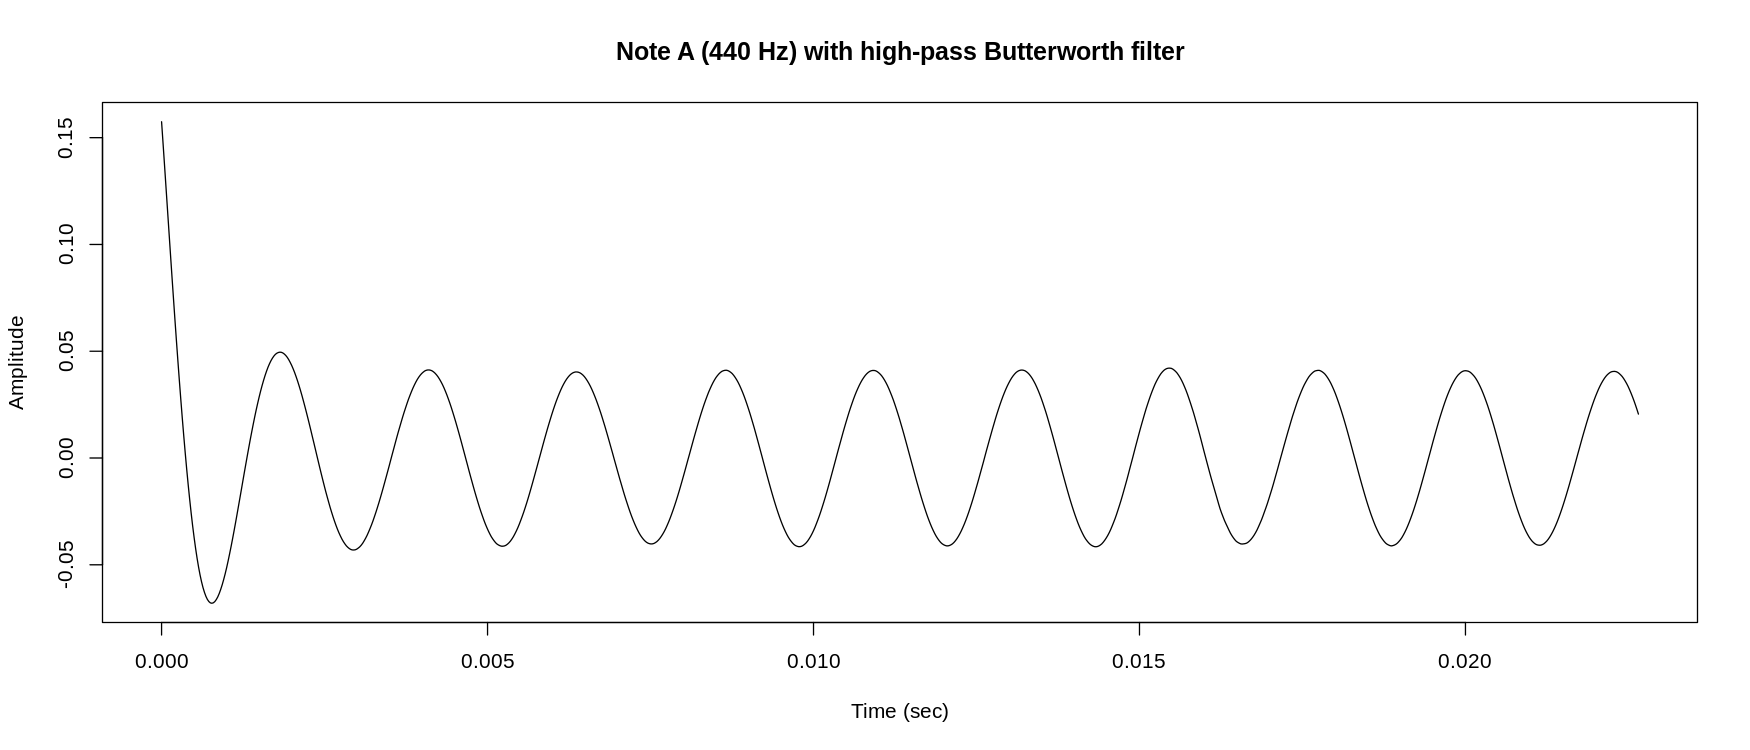

In [ ]:
plot(note.time[1:1000], 
  highp$x.filt[1:1000],
  type='l', 
  col='black',
  main = 'Note A (440 Hz) with high-pass Butterworth filter',  
  xlab='Time (sec)', 
  ylab='Amplitude')

Next, the low-pass filter.

In [ ]:
lowp <- butterworth.wge(note.reduced, 4, type = 'low', cutoff = 0.0075, plot = FALSE)

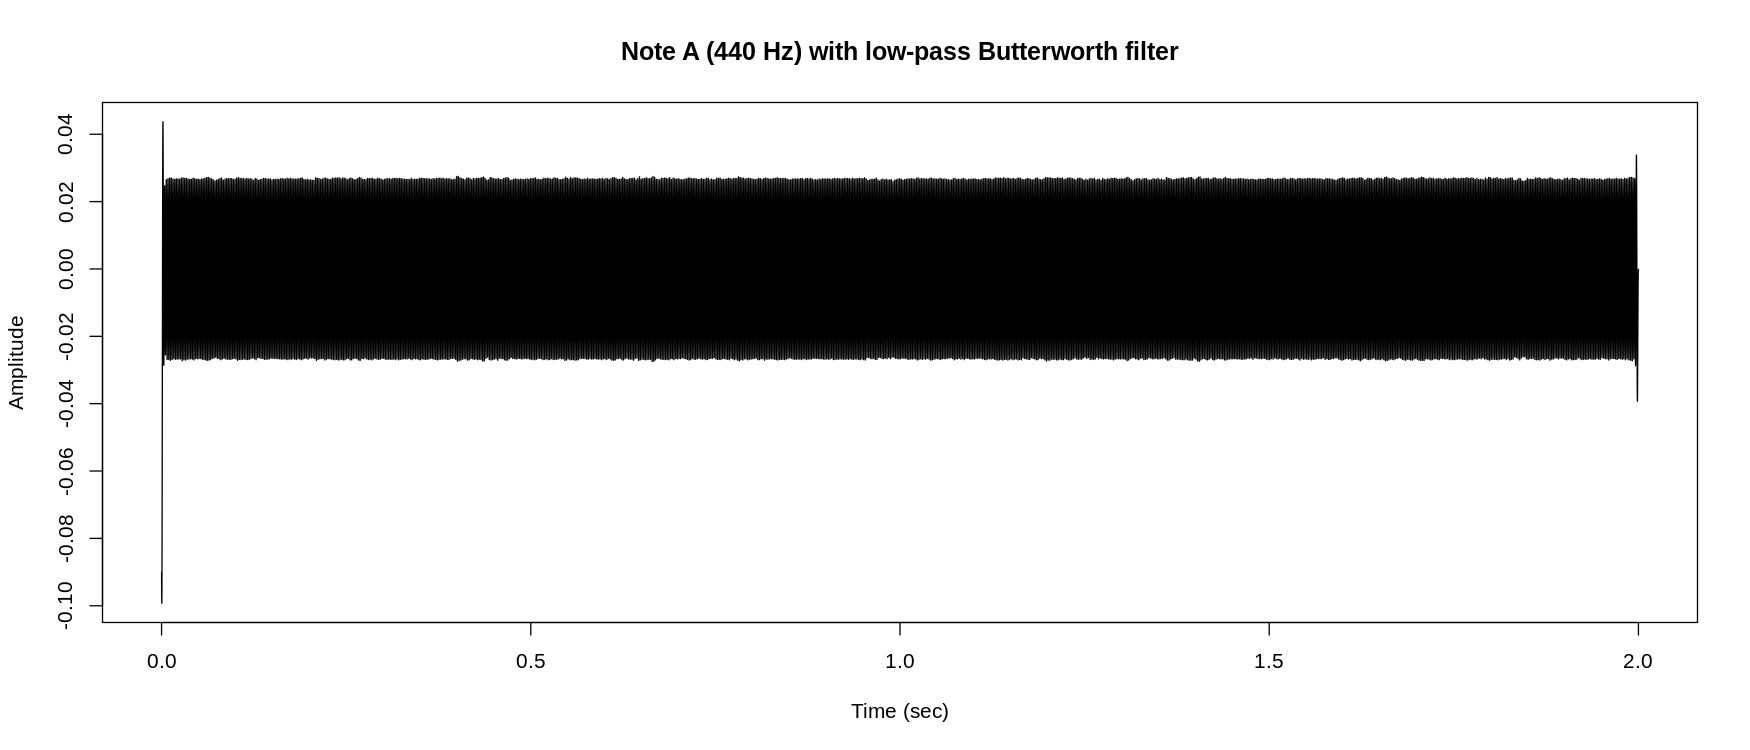

In [ ]:
plot(note.time, 
  lowp$x.filt,
  type='l', 
  col='black',
  main = 'Note A (440 Hz) with low-pass Butterworth filter',  
  xlab='Time (sec)', 
  ylab='Amplitude')

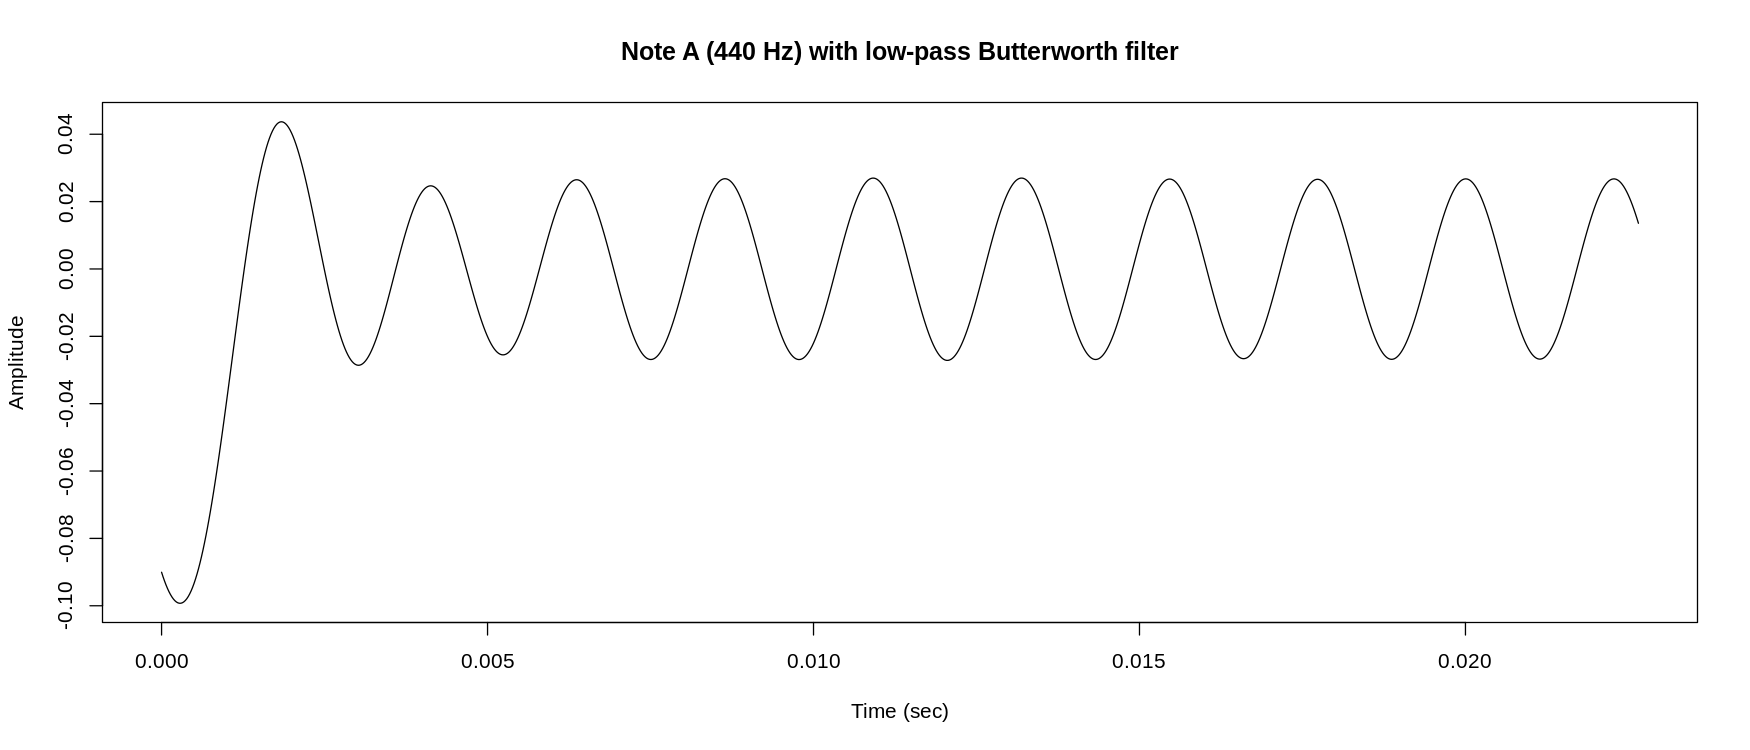

In [ ]:
plot(note.time[1:1000], 
  lowp$x.filt[1:1000],
  type='l', 
  col='black',
  main = 'Note A (440 Hz) with low-pass Butterworth filter',  
  xlab='Time (sec)', 
  ylab='Amplitude')

## Results

Original Data

Warning message in plotts.sample.wge(note.reduced, lag.max = 250):
“NaNs produced”


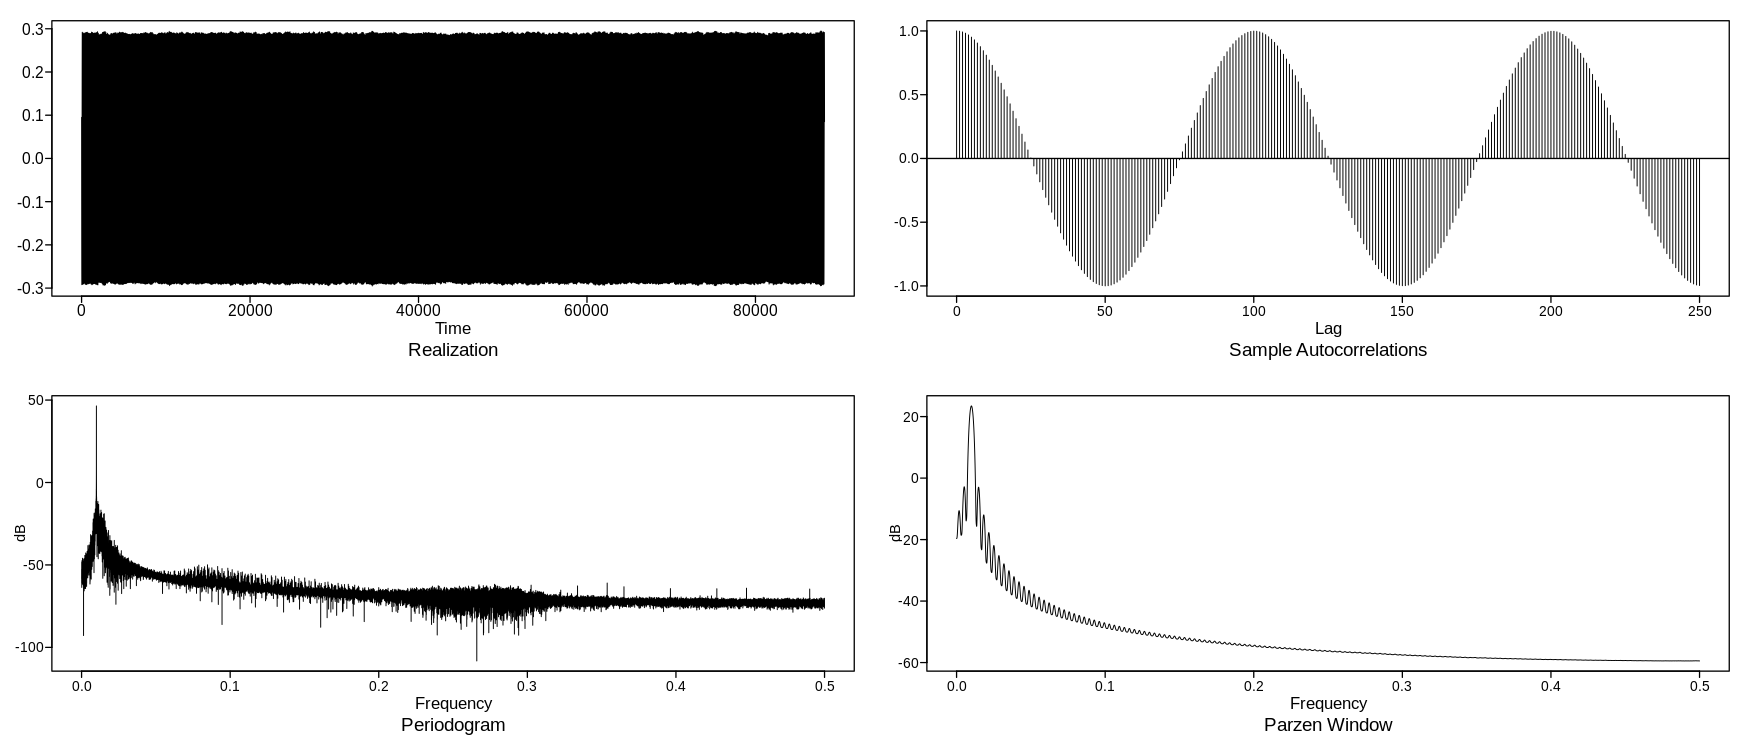

In [ ]:
origts <- plotts.sample.wge(note.reduced, lag.max = 250)

High-Pass

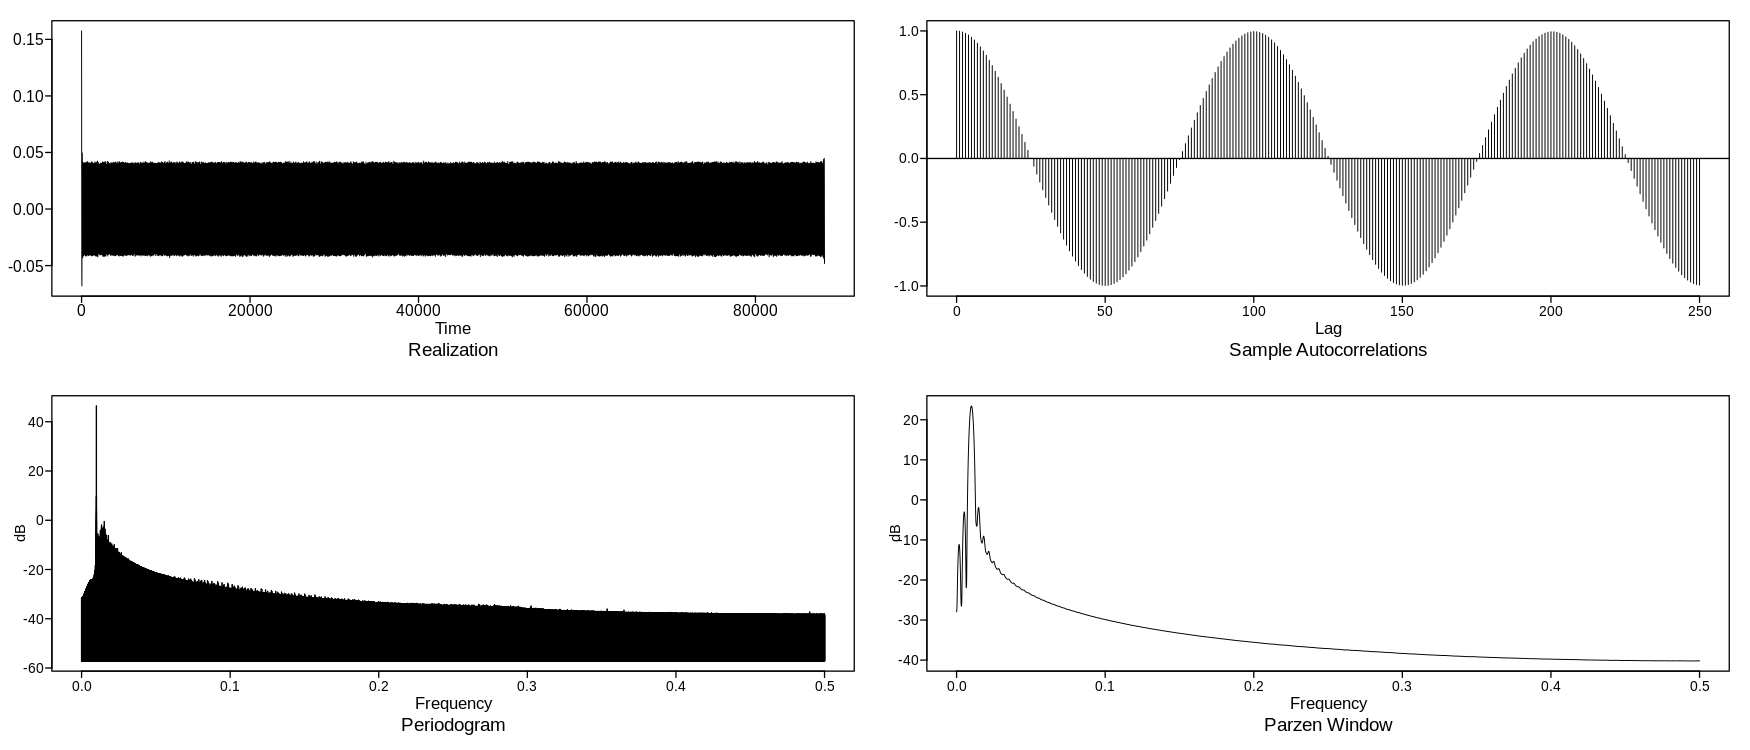

In [ ]:
hights <- plotts.sample.wge(highp$x.filt, lag.max = 250)

Low-Pass

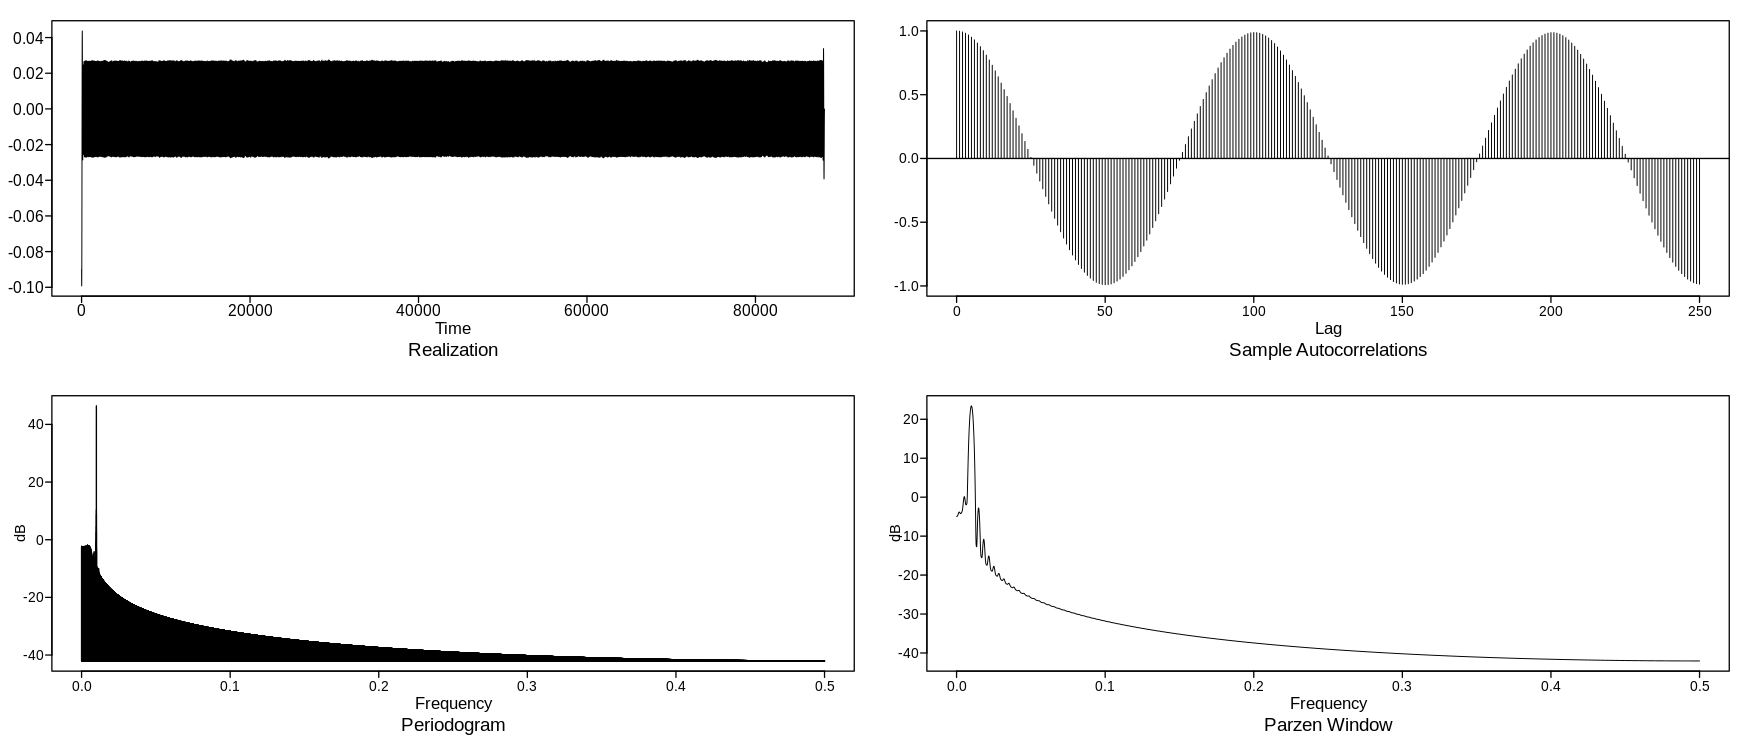

In [ ]:
lowts <- plotts.sample.wge(lowp$x.filt, lag.max = 250)

## Discussion and Conclusion

### Listen to Filtered Audio

To discuss some effects that the filters had on the data, we can listen to the produced audio ourselves.

Since play() doesn't work in this notebook/CoLab, we will have to download the .wav file ourselves and listen to it that way.

In [ ]:
my.wave.high <- Wave(highp, samp.rate = 44100, bit = 16)
my.final.high <- normalize(my.wave.high, unit = '16')
play(my.final.high)

# since play() doesn't work in this notebook/CoLab...
# save as wav file, download, and listen
writeWave(my.final.high, "./highp.wav", extensible = TRUE)

In [ ]:
my.wave.low <- Wave(highp, samp.rate = 44100, bit = 16)
my.final.low <- normalize(my.wave.low, unit = '16')
play(my.final.low)

# save as wav file, download, and listen
writeWave(my.final.low, "./lowp.wav", extensible = TRUE)

### Analyzing the Plots and Audio Files

In the original data, the audio data seems to oscillate extremely quickly (which, the rate is known, at 440 Hz) and is very consistent throughout. Even after filtering with high- and low- passes using the Butterworth method, the realizations of each have wavelengths that are still equal to the wavelengths of the original data. This means that the frequency of the audio is still the same, playing at a constant 440 Hz when run. In other words, the pitch is kept the same.

The difference that exists between each dataset (original, high-pass, low-pass) is that each has a different amplitude. Since volume is determined by amplitude, we can hear that the audio playbacks vary in volume (but with the same pitch).

Both of the high and low pass filters produced nearly identical results for each of their realizations, autocorrelations, periodograms, and even Parzen Windows. The difference between the high and low pass exists in their individual amplitudes, as shown in their realization plots. The high pass seems to oscillate from just barely 0.04 to -0.04, whereas the low pass seems to oscillate from just past 0.02 to -0.02... as a result, we can expect that the high pass has more volume in the output audio. Listening to the audio, this statement is supported. Otherwise, both plots seem to have matching results in the periodogram, where the decibels at 0 start highest (at 0 dB) and trail off into the negatives, both seemingly approaching -40 dB. On the other hand, every one of the audio tracks' autocorrelation plots are seemingly identical. If we "eyeball" the first trough in the original dataset's periodogram, we see that the trough exists at about lag = 50. This also happens to be the case for both the high-pass and low-pass filters, which further supports the idea that the frequencies are kept the same; at around 50 units of lag in each dataset, the values are opposite of each other (with an autocorrelation value of -1); the is same is true vice versa (for an autocorrelation value of +1) for approximately 100 units of lag (showing us that two values at approximately 100 units of lag they are similar).

### (Note...)

Interestingly enough, one of the reasons why I decided to apply filters upon a note with a constant frequency is because I initially wanted to disprove (or, prove...) the idea that the Butterworth filter filters based on frequency or pitch to a peer in this class. Turns out, since my data kept the frequency the same but changed the amplitude of the dataset, the Butterworth filter seems to retain the frequency.

## References

A440 (pitch standard). (2021, May 10). Retrieved May 14, 2021, from Wikipedia website: https://en.wikipedia.org/wiki/A440_(pitch_standard)

Bennett II, J. (2017, June 5). Why Do Orchestras Tune to an A-Note Pitch at 440 Hz? | How To Classical. Retrieved from WQXR website: https://www.wqxr.org/story/why-do-we-tune-a-note-pitch/

fedecasilda. (2011). Note A 440 hz [YouTube Video]. Retrieved from https://www.youtube.com/watch?v=gPBgWWZhcA4

Woodward, W. (2016, December 5). tswge: Applied Time Series Analysis. Retrieved from The Comprehensive R Archive Network website: https://cran.r-project.org/web/packages/tswge/index.html






In [ ]:
print("hello")

[1] "hello"
